In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Milestone 2


Part A — Setup
Report dataset size (rows, columns)

In [10]:
import pandas as pd
import numpy as np

# Load your dataset
# Ensure the file 'master.csv' is in the same directory
df = pd.read_csv('master.csv')

# --- Part A: Setup ---
print("Part A: Setup")
print("Dataset size (rows, columns):", df.shape)
print("-" * 40)

# --- Part B: Simple Random Sampling ---
print("Part B: Simple Random Sampling")
sample_size = 50
srs = df.sample(n=sample_size, random_state=42)

pop_mean = df['suicides/100k pop'].mean()
srs_mean = srs['suicides/100k pop'].mean()

print(f"Population mean (suicides/100k pop): {pop_mean:.4f}")
print(f"SRS Sample mean (suicides/100k pop): {srs_mean:.4f}")
print("-" * 40)

# --- Part C: Systematic Sampling ---
print("Part C: Systematic Sampling")
n_sys = 50
k = len(df) // n_sys
start = np.random.randint(0, k)
sys_sample = df.iloc[start::k][:n_sys]

sys_mean = sys_sample['suicides/100k pop'].mean()
print(f"Systematic Sample mean: {sys_mean:.4f}")
print("-" * 40)

# --- Part D: Stratified Sampling ---
print("Part D: Stratified Sampling")
# Using 'sex' as the categorical column for strata
strata_col = "sex"
sample_size_strat = 50

# proportional fraction for each group
frac = sample_size_strat / len(df)

# stratified sample
stratified_sample = df.groupby(strata_col, group_keys=False).sample(frac=frac, random_state=42)

strat_mean = stratified_sample['suicides/100k pop'].mean()
print(f"Stratified Sample mean (by gender): {strat_mean:.4f}")
print("-" * 40)

# --- Part E: Cluster Sampling ---
print("Part E: Cluster Sampling")
# Dividing the data into 10 clusters based on record index
df['cluster_id'] = df.index // (len(df)//10)
selected_clusters = np.random.choice(df['cluster_id'].unique(), size=2, replace=False)
cluster_sample = df[df['cluster_id'].isin(selected_clusters)]

cluster_mean = cluster_sample['suicides/100k pop'].mean()
print("Selected clusters:", selected_clusters)
print(f"Cluster Sample mean: {cluster_mean:.4f}")
print("-" * 40)

# --- Part F: Comparison & Reflection ---
print("Part F: Comparison Summary")
summary = {
    "Method": ["Population", "Simple Random", "Systematic", "Stratified", "Cluster"],
    "Mean (suicides/100k pop)": [pop_mean, srs_mean, sys_mean, strat_mean, cluster_mean]
}
summary_df = pd.DataFrame(summary)
print(summary_df.to_string(index=False))

print("\nReflection:")
print("The sample means vary from the population mean due to sampling error. ")
print("In this dataset, Stratified Sampling (by sex) often provides a more representative ")
print("mean because it ensures the significant disparity between male and female suicide ")
print("rates is proportionally captured.")

Part A: Setup
Dataset size (rows, columns): (27820, 12)
----------------------------------------
Part B: Simple Random Sampling
Population mean (suicides/100k pop): 12.8161
SRS Sample mean (suicides/100k pop): 9.4856
----------------------------------------
Part C: Systematic Sampling
Systematic Sample mean: 11.3104
----------------------------------------
Part D: Stratified Sampling
Stratified Sample mean (by gender): 11.4454
----------------------------------------
Part E: Cluster Sampling
Selected clusters: [9 1]
Cluster Sample mean: 12.7455
----------------------------------------
Part F: Comparison Summary
       Method  Mean (suicides/100k pop)
   Population                 12.816097
Simple Random                  9.485600
   Systematic                 11.310400
   Stratified                 11.445400
      Cluster                 12.745482

Reflection:
The sample means vary from the population mean due to sampling error. 
In this dataset, Stratified Sampling (by sex) often provi

# Milestone 3: Frequency Distribution and Data Visualization

Part 1: Data Loading and Preparation

In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # A NEW PACKAGE that runs on top ob matplotlib to generate PRETTIER IMAGES

# Set plot style
sns.set(style="whitegrid")

# Load your dataset
# Make sure the dataset file is in the same directory as this notebook, or provide the full path.
df = pd.read_csv('master.csv') # <-- Replace 'your_dataset.csv' with your dataset file name

# Display the first few rows of the dataframe to verify it's loaded correctly
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Part 2: Frequency Distribution Table

Here, we will select a column and construct a frequency distribution table.

In [13]:
import pandas as pd
import numpy as np

# 1. Select the column for analysis
column_to_analyze = 'suicides/100k pop'

# --- Create the frequency distribution table ---

# Step 1: Determine the number of bins using Sturges' Rule
# This creates a scientifically backed number of classes for your table
num_bins = int(np.ceil(1 + 3.322 * np.log10(df[column_to_analyze].count())))

# Step 2: Create bins (classes)
# This cuts the numerical data into equal-width intervals
df['bins'] = pd.cut(df[column_to_analyze], bins=num_bins)

# Step 3: Calculate Frequency (f)
freq_table = df['bins'].value_counts().reset_index()
freq_table.columns = ['Class/Category', 'Frequency (f)']

# Sort by the interval range so the table flows logically
freq_table = freq_table.sort_values(by='Class/Category').reset_index(drop=True)

# Step 4: Calculate Relative Frequency (rf)
total_count = freq_table['Frequency (f)'].sum()
freq_table['Relative Frequency (rf)'] = freq_table['Frequency (f)'] / total_count

# Step 5: Calculate Cumulative Frequency (cf)
freq_table['Cumulative Frequency (cf)'] = freq_table['Frequency (f)'].cumsum()

# Step 6: Calculate Relative Cumulative Frequency (rcf)
freq_table['Relative Cumulative Frequency (rcf)'] = freq_table['Relative Frequency (rf)'].cumsum()

# Display the frequency table
print("Frequency Distribution Table for '" + column_to_analyze + "'")
print(freq_table)

Frequency Distribution Table for 'suicides/100k pop'
        Class/Category  Frequency (f)  Relative Frequency (rf)  \
0     (-0.225, 14.061]          19715                 0.708663   
1     (14.061, 28.121]           4535                 0.163012   
2     (28.121, 42.182]           1697                 0.060999   
3     (42.182, 56.242]            729                 0.026204   
4     (56.242, 70.303]            408                 0.014666   
5     (70.303, 84.364]            333                 0.011970   
6     (84.364, 98.424]            195                 0.007009   
7    (98.424, 112.485]            101                 0.003630   
8   (112.485, 126.546]             59                 0.002121   
9   (126.546, 140.606]             16                 0.000575   
10  (140.606, 154.667]             13                 0.000467   
11  (154.667, 168.728]              5                 0.000180   
12  (168.728, 182.788]             10                 0.000359   
13  (182.788, 196.849] 

Part 3: Graphical Representation

### 3.1 Bar Chart / Histogram

/tmp/ipython-input-3679704024.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column_to_analyze, order=freq_table['Class/Category'], palette='viridis')


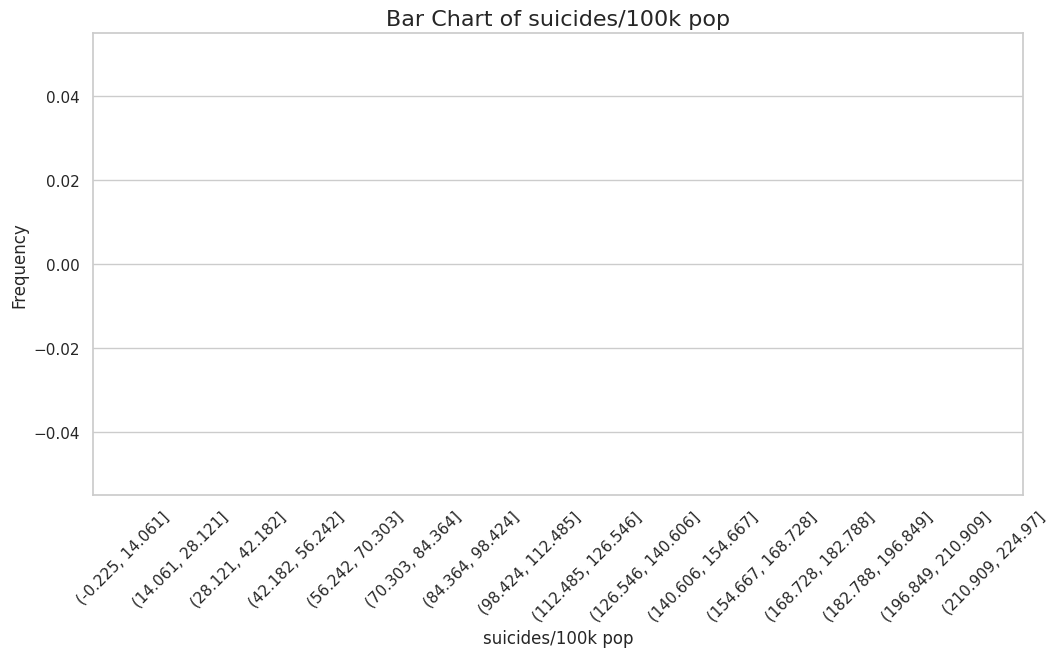

In [14]:
# Create a Bar Chart (for categorical) or a Histogram (for numerical)
plt.figure(figsize=(12, 6))

# Use sns.countplot for categorical data or sns.histplot for numerical data
sns.countplot(data=df, x=column_to_analyze, order=freq_table['Class/Category'], palette='viridis')

plt.title(f'Bar Chart of {column_to_analyze}', fontsize=16)
plt.xlabel(column_to_analyze, fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.show()

### 3.2 Line Chart / Frequency Polygon

*   List item
*   List item



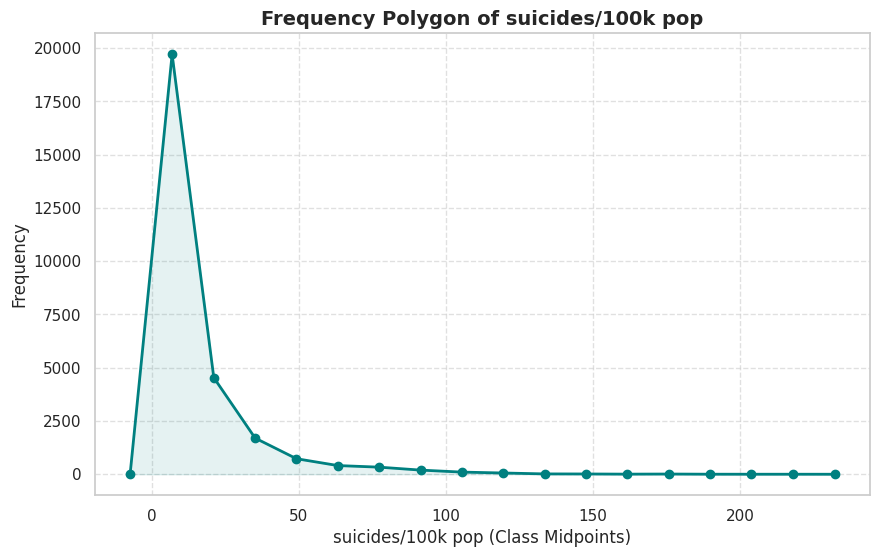

Frequency Polygon has been generated and saved as 'frequency_polygon.png'


In [18]:
import matplotlib.pyplot as plt

# --- Create a Frequency Polygon (Line Chart) ---

# 1. Calculate Class Midpoints
# The midpoint is the average of the left and right boundaries of each bin
midpoints = freq_table['Class/Category'].apply(lambda x: (x.left + x.right) / 2).tolist()

# 2. Extract frequencies
frequencies = freq_table['Frequency (f)'].tolist()

# 3. "Close" the polygon
# We add a zero-frequency point at the beginning and end
# Calculate the width of one bin (class interval)
bin_width = freq_table['Class/Category'].iloc[0].right - freq_table['Class/Category'].iloc[0].left

# Add a point before the first class and after the last class
x_values = [midpoints[0] - bin_width] + midpoints + [midpoints[-1] + bin_width]
y_values = [0] + frequencies + [0]

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='teal', linewidth=2)
plt.fill_between(x_values, y_values, color='teal', alpha=0.1) # Optional: adds a light fill under the line

# Formatting the chart
plt.title(f'Frequency Polygon of {column_to_analyze}', fontsize=14, fontweight='bold')
plt.xlabel(f'{column_to_analyze} (Class Midpoints)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# 5. Save and Show
plt.savefig('frequency_polygon.png', bbox_inches='tight', dpi=300)
plt.show()

print("Frequency Polygon has been generated and saved as 'frequency_polygon.png'")

:### 3.3 Ogive Chart (Cumulative Frequency Graph)

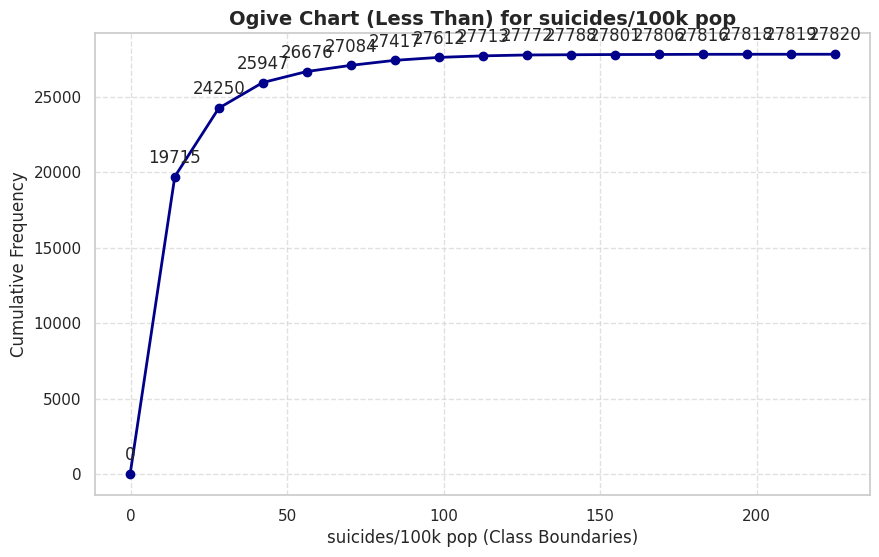

Ogive Chart has been generated and saved as 'ogive_chart.png'


In [17]:
import matplotlib.pyplot as plt

# --- Create an Ogive Chart (Corrected) ---

# 1. Extract the upper boundaries of each bin for the x-axis
# We use the '.right' attribute of the Interval objects
upper_bounds = freq_table['Class/Category'].apply(lambda x: x.right).tolist()

# 2. Get the lower boundary of the very first bin to start the graph at zero
lower_start = freq_table['Class/Category'].iloc[0].left

# 3. Prepare the x and y values
# x-axis: [Starting Point, Upper Bound 1, Upper Bound 2, ...]
# y-axis: [0, CF 1, CF 2, ...]
x_values = [lower_start] + upper_bounds
y_values = [0] + freq_table['Cumulative Frequency (cf)'].tolist()

# 4. Plotting
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', color='darkblue', linewidth=2)

# Formatting the chart
plt.title(f'Ogive Chart (Less Than) for {column_to_analyze}', fontsize=14, fontweight='bold')
plt.xlabel(f'{column_to_analyze} (Class Boundaries)', fontsize=12)
plt.ylabel('Cumulative Frequency', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Adding labels to the points for clarity
for i, txt in enumerate(y_values):
    plt.annotate(f'{txt:.0f}', (x_values[i], y_values[i]), textcoords="offset points", xytext=(0,10), ha='center')

# 5. Save and Show
plt.savefig('ogive_chart.png', bbox_inches='tight', dpi=300)
plt.show()

print("Ogive Chart has been generated and saved as 'ogive_chart.png'")

# Milestone 4 - STA 2101: Measures of Central Tendency and Dispersion
Department of Computer Science and Engineering, ULAB

This notebook contains tasks to calculate mean, median, mode, variance, and standard deviation for selected numerical columns of your dataset.

In [20]:
# Load your dataset
df = pd.read_csv('master.csv')  # Replace with your dataset path
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Task 1: Measures of Central Tendency
Select at least two numerical columns and calculate mean, median, and mode.

In [23]:
# Select numerical columns
num_cols = ['suicides_no', 'suicides/100k pop']  # Replace with your columns

for col in num_cols:
    print(f'\nColumn: {col}')
    mean_val = df[col].mean()
    median_val = df[col].median()
    mode_val = df[col].mode().tolist()
    print(f'Mean: {mean_val}')
    print(f'Median: {median_val}')
    print(f'Mode: {mode_val}')


Column: suicides_no
Mean: 242.57440690150972
Median: 25.0
Mode: [0]

Column: suicides/100k pop
Mean: 12.816097411933864
Median: 5.99
Mode: [0.0]


Task 2: Measures of Dispersion
Calculate variance and standard deviation for the selected columns.

In [24]:
# 1. Select only the relevant numerical columns for analysis
# We often exclude 'year' because calculating the variance of a year isn't statistically meaningful.
num_cols = ['suicides/100k pop', 'suicides_no', 'population', 'gdp_per_capita ($)']

print("--- Measures of Dispersion (Variance & Standard Deviation) ---")

for col in num_cols:
    # Calculate values
    variance_val = df[col].var()
    std_dev_val = df[col].std()

    # Print formatted results
    print(f'\nColumn: {col}')
    print(f'  Variance:           {variance_val:,.4f}')
    print(f'  Standard Deviation: {std_dev_val:,.4f}')

# Optional: Add a brief interpretation for your report
print("\nInterpretation:")
print(f"The Standard Deviation of {num_cols[0]} shows how much the suicide rates")
print("deviate from the mean across different countries and years.")

--- Measures of Dispersion (Variance & Standard Deviation) ---

Column: suicides/100k pop
  Variance:           359.5389
  Standard Deviation: 18.9615

Column: suicides_no
  Variance:           813,690.4443
  Standard Deviation: 902.0479

Column: population
  Variance:           15,302,018,400,947.7656
  Standard Deviation: 3,911,779.4418

Column: gdp_per_capita ($)
  Variance:           356,740,544.9934
  Standard Deviation: 18,887.5765

Interpretation:
The Standard Deviation of suicides/100k pop shows how much the suicide rates
deviate from the mean across different countries and years.


## Task 3: Visualization
Plot histograms with mean, median, and mode indicated.

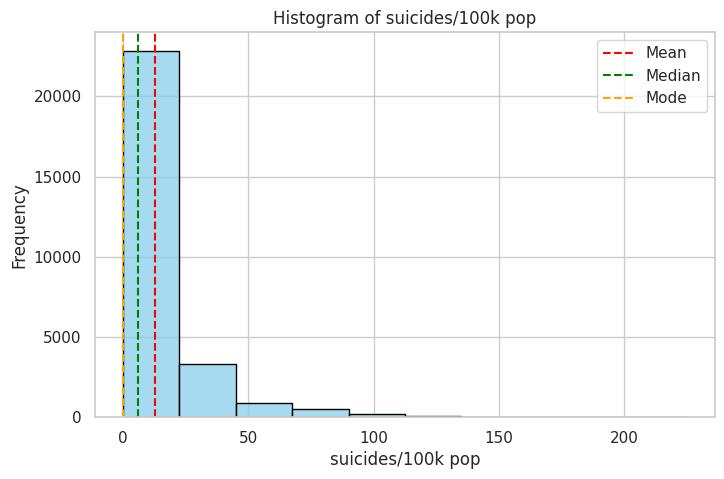

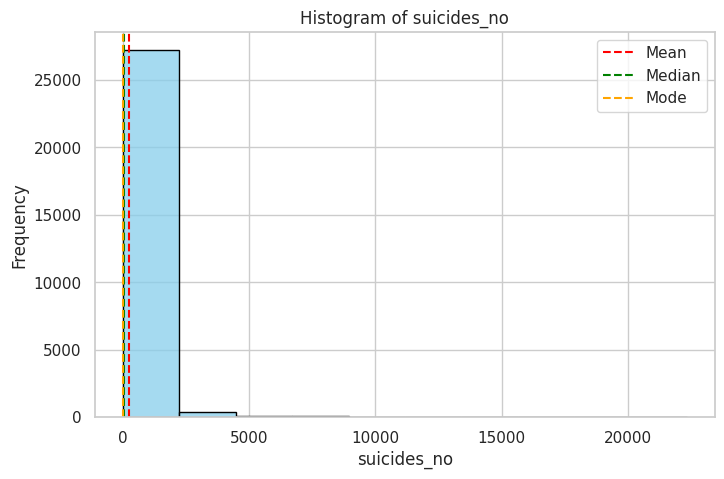

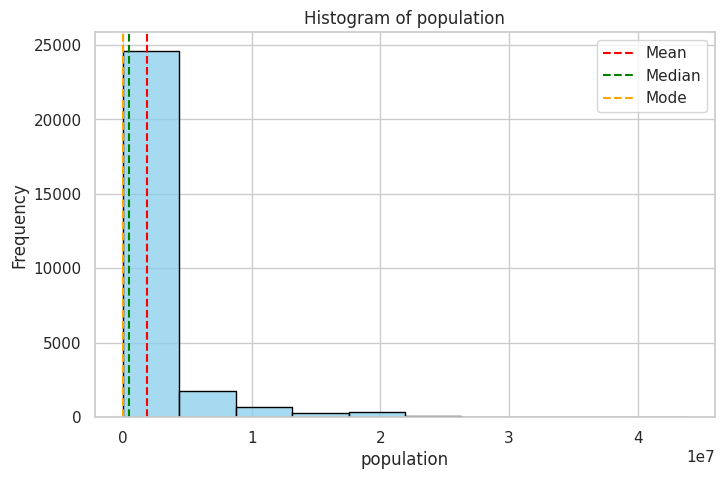

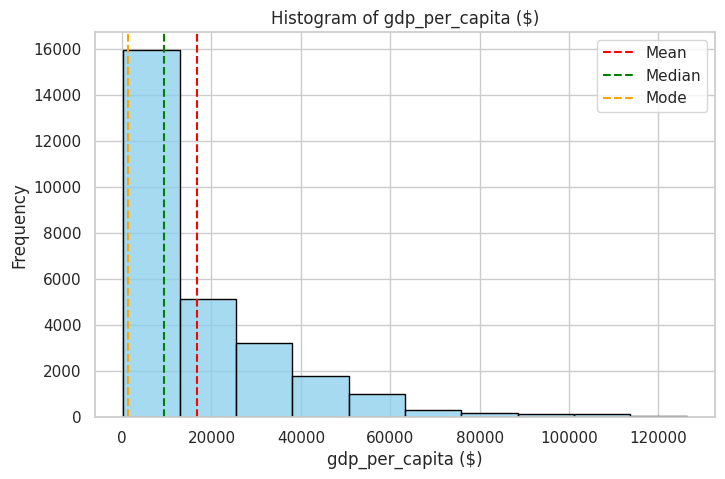

In [25]:
for col in num_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=10, kde=False, color='skyblue', edgecolor='black')
    plt.axvline(df[col].mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
    plt.axvline(df[col].median(), color='green', linestyle='dashed', linewidth=1.5, label='Median')
    plt.axvline(df[col].mode()[0], color='orange', linestyle='dashed', linewidth=1.5, label='Mode')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

Milestone 5

Section A: Setup & Load Dataset

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
# Replace with the actual filename
df = pd.read_csv('master.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


Section B: Treat Dataset as Sample Space

In [ ]:
N = len(df)
print('Total observations:', N)

[ ]
N = len(df)
print('Total observations:', N)
Section C: Task 1 – Defining Events

In [27]:
# --- Event Definitions for Suicide Rates Dataset ---

# Event A: High Risk Observations (Suicide rate > 20 per 100k population)
A = df[df['suicides/100k pop'] > 20]

# Event B: Demographic focus (Gender is Male)
B = df[df['sex'] == 'male']

# Event C: Economic Middle Tier (GDP per capita between $5,000 and $20,000)
# This represents countries in a specific economic development range
C = df[(df['gdp_per_capita ($)'] >= 5000) & (df['gdp_per_capita ($)'] <= 20000)]

# Display sizes for the report
print(f'Event A (High Risk > 20) size: {len(A)}')
print(f'Event B (Male) size:           {len(B)}')
print(f'Event C (Mid-GDP Tier) size:   {len(C)}')

# Optional: Calculate total N for context
N = len(df)
print(f'Total Observations (N):        {N}')

Event A (High Risk > 20) size: 5747
Event B (Male) size:           13910
Event C (Mid-GDP Tier) size:   9332
Total Observations (N):        27820


Section D: Task 2 – Calculating Basic Probability

In [28]:
P_A = len(A) / N
P_B = len(B) / N
P_C = len(C) / N

print('P(A) =', P_A)
print('P(B) =', P_B)
print('P(C) =', P_C)

P(A) = 0.20657800143781452
P(B) = 0.5
P(C) = 0.33544212796549244


Section E: Task 3 – Combined Events

In [9]:
# 1. Define the total number of observations
N = len(df)

# 2. Define the individual probabilities
# Event A: Suicide rate > 15 (High Risk)
P_A = len(df[df['suicides/100k pop'] > 15]) / N

# Event B: Gender is Male
P_B = len(df[df['sex'] == 'male']) / N

# 3. Intersection: High Risk AND Male (P(A ∩ B))
A_int_B = df[(df['suicides/100k pop'] > 15) & (df['sex'] == 'male')]
P_A_int_B = len(A_int_B) / N
print(f'P(A ∩ B) [Male AND High Risk]: {P_A_int_B:.4f}')

# 4. Union: High Risk OR Male (P(A ∪ B))
A_union_B = df[(df['suicides/100k pop'] > 15) | (df['sex'] == 'male')]
P_A_union_B = len(A_union_B) / N
print(f'P(A ∪ B) [Male OR High Risk]: {P_A_union_B:.4f}')

# 5. Complement: NOT High Risk (P(Aᶜ))
A_comp = df[df['suicides/100k pop'] <= 15]
P_A_comp = len(A_comp) / N
print(f'P(Aᶜ) [Not High Risk]: {P_A_comp:.4f}')

# 6. Addition Rule Verification
# P(A ∪ B) = P(A) + P(B) - P(A ∩ B)
rule_value = P_A + P_B - P_A_int_B
print('---')
print(f'Rule Verification (P(A)+P(B)-P(A∩B)): {rule_value:.4f}')
print(f'Actual P(A ∪ B) from data: {P_A_union_B:.4f}')
print(f'Difference: {abs(rule_value - P_A_union_B):.10f}')

P(A ∩ B) [Male AND High Risk]: 0.2333
P(A ∪ B) [Male OR High Risk]: 0.5413
P(Aᶜ) [Not High Risk]: 0.7254
---
Rule Verification (P(A)+P(B)-P(A∩B)): 0.5413
Actual P(A ∪ B) from data: 0.5413
Difference: 0.0000000000


Section F: Visualization

In [ ]:
counts = [len(A), len(A_comp)]
labels = ['A: Marks > 70', 'Aᶜ: Marks ≤ 70']

plt.bar(labels, counts)
plt.title('Event A and Complement Frequency')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Section'].value_counts().plot(kind='bar')
plt.title('Section Frequency')
plt.ylabel('Count')
plt.xlabel('Section')
plt.show()

Milestone 6

A. Setup and Data Loading

In [29]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

# Set a consistent visual style
sns.set_style('whitegrid')

# Load your dataset (Replace 'your_data.csv' with your actual file name)
try:
    df = pd.read_csv('master.csv')
    # Display the first few rows and info to confirm load
    print("Data loaded successfully:")
    display(df.head())
    df.info()
except FileNotFoundError:
    print("Error: 'your_data.csv' not found. Please update the file path.")
    # Create a dummy DataFrame if the file isn't found, for structure (students should replace this)
    data = {'Score': [75, 88, 62, 95, 70],
            'Section': ['A', 'B', 'A', 'B', 'A'],
            'Age': [20, 21, 20, 22, 21]}
    df = pd.DataFrame(data)


# --- Data Preprocessing (Optional: Add your cleaning/filtering steps here) ---
# Example: df = df.dropna(subset=['Score', 'Section'])

Data loaded successfully:


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


C. Task 1: Define Events

In [30]:
# --- Define helper functions/filters for the events (A and B) based on your DataFrame ---

# Define Event A: suicides/100k pop > 15
# Using 'suicides/100k pop' as a numerical variable and 15 as a threshold
filter_A = df['suicides/100k pop'] > 15
count_A = len(df[filter_A])

# Define Event B: sex = 'male'
# Using 'sex' as a categorical variable
filter_B = df['sex'] == 'male'
count_B = len(df[filter_B])

# Event A AND B (Intersection)
filter_A_and_B = filter_A & filter_B
count_A_and_B = len(df[filter_A_and_B])

N = len(df) # Total number of observations

print(f"Total Observations (N): {N}")
print(f"Count(A): {count_A}")
print(f"Count(B): {count_B}")
print(f"Count(A ∩ B): {count_A_and_B}")

Total Observations (N): 27820
Count(A): 7639
Count(B): 13910
Count(A ∩ B): 6490


D. Task 2: Conditional Probability
💡 Knowledge Point: Conditional Probability
The conditional probability of event A occurring, given that event B has already occurred, is calculated as:

P(A∣B)=P(A∩B)P(B)

Where:

P(A∩B)  is the probability of both A and B occurring (Joint Probability).
P(B)  is the probability of B occurring (Marginal Probability).
Compute  P(A) ,  P(B) , and  P(A∣B)  for your chosen events A and B.

In [31]:
# 1. Compute P(A) and P(B)
P_A = count_A / N
P_B = count_B / N

# 2. Compute P(A ∩ B)
P_A_and_B = count_A_and_B / N

# 3. Compute P(A | B) using the formula
P_A_given_B = P_A_and_B / P_B

print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B:.4f}")
print(f"P(A | B) = {P_A_given_B:.4f}")

P(A) = 0.2746
P(B) = 0.5000
P(A | B) = 0.4666


E. Task 3: Independence Check
💡 Knowledge Point: Independence of Events
Two events  A  and  B  are independent if the occurrence of one does not affect the probability of the other. Mathematically, this is checked by the Multiplication Rule for Independent Events:

P(A∩B)=P(A)P(B)

If  P(A∩B)≠P(A)P(B) , the events are dependent.

Check if events  A  and  B  are independent by comparing the joint probability  P(A∩B)  with the product  P(A)P(B) .

In [32]:
product_P_A_P_B = P_A * P_B

print(f"P(A ∩ B) (Empirical Joint Prob): {P_A_and_B:.4f}")
print(f"P(A) * P(B) (Product of Marginal Probs): {product_P_A_P_B:.4f}")

difference = abs(P_A_and_B - product_P_A_P_B)

# Check for approximate equality (Use a small tolerance for 'independence')
if difference < 0.01:
    print("\nConclusion: P(A ∩ B) is approximately equal to P(A)P(B).")
    print("The events A and B are **Independent**.")
else:
    print("\nConclusion: P(A ∩ B) is NOT equal to P(A)P(B).")
    print("The events A and B are **Dependent**.")

P(A ∩ B) (Empirical Joint Prob): 0.2333
P(A) * P(B) (Product of Marginal Probs): 0.1373

Conclusion: P(A ∩ B) is NOT equal to P(A)P(B).
The events A and B are **Dependent**.


F. Task 4: Bayes' Rule
💡 Knowledge Point: Bayes' Rule
Bayes' Rule allows us to reverse the conditional probability. If we know  P(A∣B) , we can find  P(B∣A)  using the following formula:

P(B∣A)=P(A∣B)P(B)P(A)

Use Bayes' Rule to compute  P(B∣A)  from the probabilities calculated in Task 2. Then, compare this result with the empirical value  P(B∣A)  calculated directly from the data.

In [33]:
# 1. Compute P(B | A) using Bayes' Rule
P_B_given_A_Bayes = (P_A_given_B * P_B) / P_A

# 2. Compute P(B | A) empirically from the dataset (P(A ∩ B) / P(A))
P_B_given_A_Empirical = P_A_and_B / P_A

print(f"P(A | B) (from Task 2): {P_A_given_B:.4f}")
print(f"P(A) (from Task 2): {P_A:.4f}")
print(f"P(B) (from Task 2): {P_B:.4f}")
print("\n---")
print(f"P(B | A) via Bayes' Rule: {P_B_given_A_Bayes:.4f}")
print(f"P(B | A) Empirical: {P_B_given_A_Empirical:.4f}")

# The two values should be mathematically identical (within floating point error)
print(f"Difference: {abs(P_B_given_A_Bayes - P_B_given_A_Empirical):.8f}")

P(A | B) (from Task 2): 0.4666
P(A) (from Task 2): 0.2746
P(B) (from Task 2): 0.5000

---
P(B | A) via Bayes' Rule: 0.8496
P(B | A) Empirical: 0.8496
Difference: 0.00000000


G. Task 5: Probability Distribution (Normal Only)
G1. Explore a Numerical Variable
💡 Knowledge Point: Normal Distribution
The Normal Distribution  X∼N(μ,σ2)  is a continuous, bell-shaped distribution defined entirely by its mean ( mu ) and standard deviation ( sigma ).

The 68-95-99.7 Rule states that approximately:

68% of data falls within  μ±1σ .
95% of data falls within  μ±2σ .
Select a numerical variable (e.g., Score) and analyze its fit to the Normal Distribution.

<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-944446459.py:25: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal Curve ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')
/tmp/ipython-input-944446459.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, p, 'k', linewidth=2, label=f'Normal Curve ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')


Selected Variable: suicides/100k pop
Mean (μ): 12.82
Standard Deviation (σ): 18.96


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

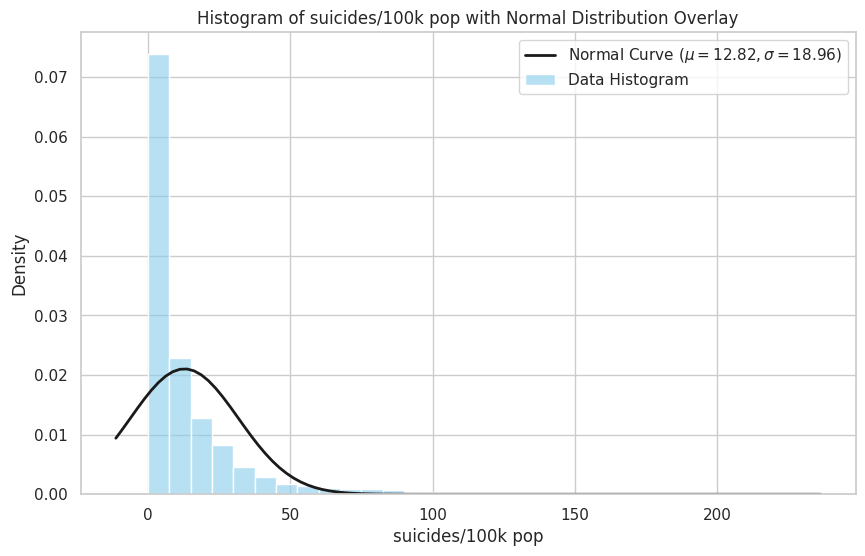

In [34]:
# Select your numerical variable
numerical_variable = 'suicides/100k pop' # REPLACE with your chosen numerical variable
data_series = df[numerical_variable]

# 1. Compute Mean (μ) and Standard Deviation (σ)
mu = data_series.mean()
sigma = data_series.std()

print(f"Selected Variable: {numerical_variable}")
print(f"Mean (μ): {mu:.2f}")
print(f"Standard Deviation (σ): {sigma:.2f}")

# 2. Plot Histogram and Overlay Normal Curve
plt.figure(figsize=(10, 6))

# Plot the histogram of the data
sns.histplot(data_series, bins=30, kde=False, color='skyblue', alpha=0.6, stat="density", label='Data Histogram')

# Generate points for the theoretical Normal Distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma) # Probability Density Function (PDF)

# Plot the Normal Distribution curve
plt.plot(x, p, 'k', linewidth=2, label=f'Normal Curve ($\mu={mu:.2f}, \sigma={sigma:.2f}$)')

title = f"Histogram of {numerical_variable} with Normal Distribution Overlay"
plt.title(title)
plt.xlabel(numerical_variable)
plt.ylabel('Density')
plt.legend()
plt.savefig('normal_distribution_plot.png', dpi=300, bbox_inches='tight')
from google.colab import files
files.download('normal_distribution_plot.png')

plt.show()

G2. Normal Probability Questions
💡 Knowledge Point: Calculating Normal Probabilities
We use the scipy.stats.norm functions for calculating theoretical probabilities:

norm.cdf(x, loc=mu, scale=sigma): Calculates  P(X≤x) , the Cumulative Distribution Function.
norm.sf(x, loc=mu, scale=sigma): Calculates  P(X>x) , the Survival Function.
Use the fitted Normal distribution ( X∼N(μ,σ2) ) to compute the required theoretical probabilities.

In [ ]:
# 1. P(X > μ)
# Use the Survival Function (SF) for P(X > x)
P_greater_mu = norm.sf(mu, loc=mu, scale=sigma)

# 2. P(μ - σ < X < μ + σ) - Probability within 1 sigma
lower_1sigma = mu - sigma
upper_1sigma = mu + sigma
# P(Upper) - P(Lower) = P(a < X < b)
P_1sigma = norm.cdf(upper_1sigma, loc=mu, scale=sigma) - norm.cdf(lower_1sigma, loc=mu, scale=sigma)

# 3. P(X < μ - 2σ) - Probability less than 2 sigmas below the mean
# Use the Cumulative Distribution Function (CDF) for P(X <= x)
lower_2sigma = mu - 2 * sigma
P_less_2sigma = norm.cdf(lower_2sigma, loc=mu, scale=sigma)

print(f"Theoretical Probabilities based on N({mu:.2f}, {sigma**2:.2f}):")
print(f"P(X > μ) = {P_greater_mu:.4f}")
print(f"P({lower_1sigma:.2f} < X < {upper_1sigma:.2f}) [1σ range] = {P_1sigma:.4f}")
print(f"P(X < {lower_2sigma:.2f}) [Less than μ-2σ] = {P_less_2sigma:.4f}")

print("\n--- Interpretation ---")
print(f"Interpretation 1: The theoretical probability of a [unit, e.g., student] having a {numerical_variable} **greater than the mean** is {P_greater_mu:.2%}.")
print(f"Interpretation 2: The theoretical probability of a [unit] having a {numerical_variable} **within one standard deviation** of the mean is {P_1sigma:.2%}.")
print(f"Interpretation 3: The theoretical probability of a [unit] having a {numerical_variable} **less than two standard deviations below the mean** is {P_less_2sigma:.2%}.")

H. Task 6: Reflection
Summarize your findings and discuss the broader implications of these concepts.

Milestone 7


--- Task 1: Data Selection and Initial Visualization ---
Independent Variable (X): Study_Hours
Dependent Variable (Y): Exam_Score

Mean of X (Study_Hours): 6.38
Mean of Y (Exam_Score): 79.40
Variance of X: 6.30
Variance of Y: 219.60


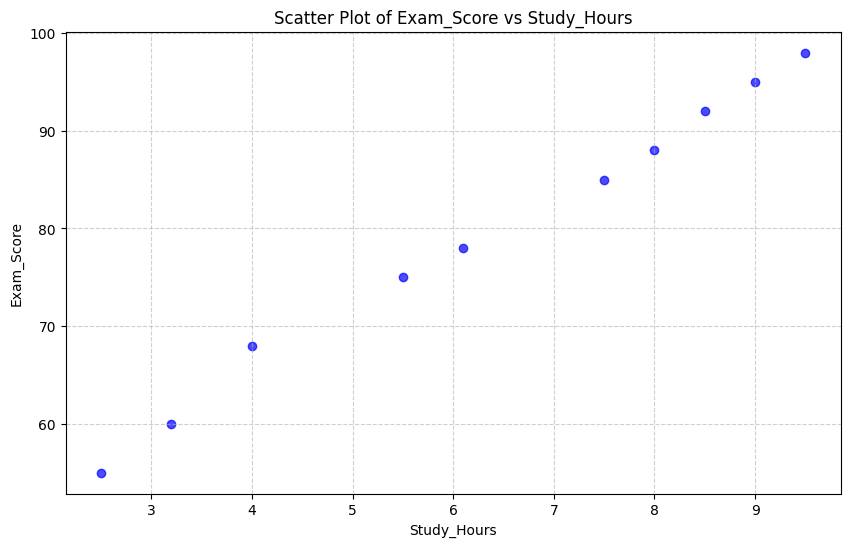


--- Task 2: Manual Calculation of Regression Parameters ---
Numerator (Sum of products of deviations): 333.58
Denominator (Sum of squared deviations of X): 56.66

Computed Slope (β1): 5.8878
Computed Intercept (β0): 41.8357

Estimated Regression Equation: Ŷ = 41.8357 + 5.8878 * X

--- Task 3: Visualization of the Fit ---


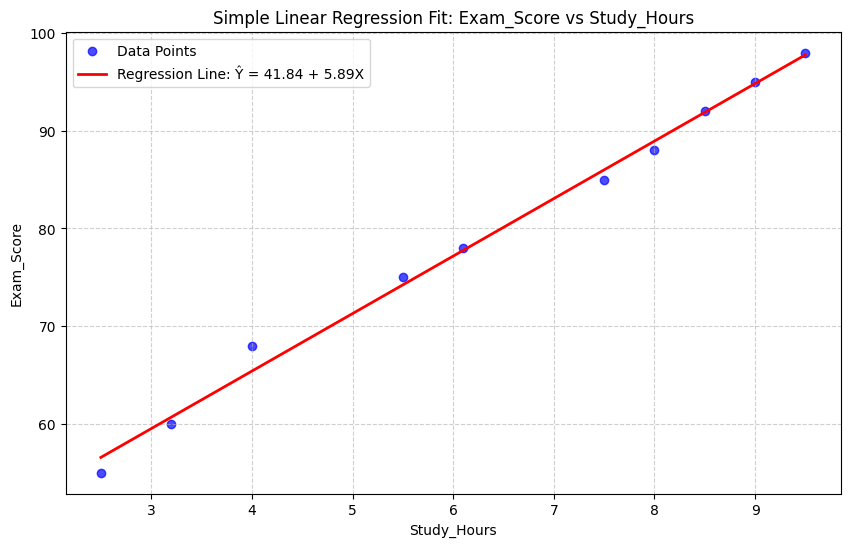


--- Task 4: Strength of Relationship ---
Pearson Correlation Coefficient (r): 0.9969
Coefficient of Determination (R²): 0.9938

--- OPTIONAL: Verification using scikit-learn ---
Manual Slope (β1): 5.8878 | SKL Slope (β1):    5.8878
Manual Intercept (β0): 41.8357 | SKL Intercept (β0):    41.8357
Manual R²: 0.9938 | SKL R²:    0.9938

Verification successful: Manual results match scikit-learn (within tolerance).

--- Task 5: Reflection ---
Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.


In [6]:
# ==============================================================================
# MILESTONE 7: SIMPLE LINEAR REGRESSION (MANUAL COMPUTATION)
# STA 2101: Statistics & Probability
#
# Objective: Calculate the parameters of the best-fit line (β0 and β1) and the
# correlation coefficient (r) using manual calculation methods.
# ==============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- DUMMY DATA SETUP (REPLACE WITH YOUR ACTUAL DATA LOADING) ---
# NOTE: This data is for demonstration. Replace with your actual dataset load.
data = {
    'Study_Hours': [2.5, 3.2, 4.0, 5.5, 6.1, 7.5, 8.0, 8.5, 9.0, 9.5],
    'Exam_Score': [55, 60, 68, 75, 78, 85, 88, 92, 95, 98]
}
df = pd.DataFrame(data)

# --- TASK 1: DATA SELECTION AND INITIAL VISUALIZATION ---
# Select the independent (X) and dependent (Y) variables.
X = df['Study_Hours']
Y = df['Exam_Score']

print("--- Task 1: Data Selection and Initial Visualization ---")
print(f"Independent Variable (X): {X.name}")
print(f"Dependent Variable (Y): {Y.name}\n")

# 1. Compute Summary Statistics
X_mean = X.mean()
Y_mean = Y.mean()
X_var = X.var(ddof=1) # Sample Variance
Y_var = Y.var(ddof=1)

print(f"Mean of X ({X.name}): {X_mean:.2f}")
print(f"Mean of Y ({Y.name}): {Y_mean:.2f}")
print(f"Variance of X: {X_var:.2f}")
print(f"Variance of Y: {Y_var:.2f}")

# 2. Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.7)
plt.title(f'Scatter Plot of {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 2: MANUAL CALCULATION OF REGRESSION PARAMETERS (SLOPE AND INTERCEPT) ---
# ------------------------------------------------------------------------------

print("\n--- Task 2: Manual Calculation of Regression Parameters ---")

# Step 1: Calculate Deviation Scores
# X_dev = (Xi - X_mean)
# Y_dev = (Yi - Y_mean)
X_dev = X - X_mean
Y_dev = Y - Y_mean

# Step 2: Calculate Components for the Slope (β1)
#
# FORMULA for β1 (Slope):
# β1 = [ Σ(Xi - X̄)(Yi - Ȳ) ] / [ Σ(Xi - X̄)² ]
#
# HINT: The numerator is the sum of the product of deviations.
# HINT: The denominator is the sum of the squared deviations of X.

numerator_b1 = (X_dev * Y_dev).sum() # COMPLETED: Implements the numerator calculation
denominator_b1 = (X_dev**2).sum() # COMPLETED: Implements the denominator calculation

print(f"Numerator (Sum of products of deviations): {numerator_b1:.2f}")
print(f"Denominator (Sum of squared deviations of X): {denominator_b1:.2f}")

# Step 3: Compute Slope (β1)
beta_1 = numerator_b1 / denominator_b1 # COMPLETED: Implements the final β1 calculation

print(f"\nComputed Slope (β1): {beta_1:.4f}")

# Step 4: Compute Intercept (β0)
#
# FORMULA for β0 (Y-Intercept):
# β0 = Ȳ - β1 * X̄

beta_0 = Y_mean - beta_1 * X_mean # COMPLETED: Implements the β0 calculation

print(f"Computed Intercept (β0): {beta_0:.4f}")

# Step 5: Formulate the Model
print(f"\nEstimated Regression Equation: Ŷ = {beta_0:.4f} + {beta_1:.4f} * X")

# ------------------------------------------------------------------------------
# --- TASK 3: VISUALIZATION OF THE FIT ---
# ------------------------------------------------------------------------------

print("\n--- Task 3: Visualization of the Fit ---")

# 1. Generate Predictions (Ŷ)
# FORMULA: Ŷi = β0 + β1 * Xi
Y_pred = beta_0 + beta_1 * X # COMPLETED: Implements the prediction calculation

# 2. Plot Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, color='blue', label='Data Points', alpha=0.7)
plt.plot(X, Y_pred, color='red', linewidth=2, label=f'Regression Line: Ŷ = {beta_0:.2f} + {beta_1:.2f}X')
plt.title(f'Simple Linear Regression Fit: {Y.name} vs {X.name}')
plt.xlabel(X.name)
plt.ylabel(Y.name)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# ------------------------------------------------------------------------------
# --- TASK 4: STRENGTH OF RELATIONSHIP (CORRELATION AND R-SQUARED) ---
# ------------------------------------------------------------------------------

print("\n--- Task 4: Strength of Relationship ---")

# 1. Compute Pearson Correlation Coefficient (r)
#
# FORMULA for r:
# r = [ Σ(Xi - X̄)(Yi - Ȳ) ] / [ √[Σ(Xi - X̄)² * Σ(Yi - Ȳ)²] ]
#
# We already have the numerator (numerator_b1) and Σ(Xi - X̄)² (denominator_b1).
# We still need Σ(Yi - Ȳ)²:

sum_squared_deviations_Y = (Y_dev**2).sum() # COMPLETED: Implements Σ(Yi - Ȳ)² calculation
denominator_r = np.sqrt(denominator_b1 * sum_squared_deviations_Y) # COMPLETED: Implements the denominator of r

r = numerator_b1 / denominator_r # COMPLETED: Implements the final r calculation
print(f"Pearson Correlation Coefficient (r): {r:.4f}")

# 2. Compute Coefficient of Determination (R²)
# FORMULA: R² = r²
R_squared = r**2 # COMPLETED: Implements the R² calculation
print(f"Coefficient of Determination (R²): {R_squared:.4f}")

# ------------------------------------------------------------------------------
# --- OPTIONAL SECTION: Compare with scikit-learn Library Solution ---
# This section is strictly for verification of your manual calculations.
# ------------------------------------------------------------------------------

try:
    from sklearn.linear_model import LinearRegression
    print("\n--- OPTIONAL: Verification using scikit-learn ---")

    # Reshape X for scikit-learn (required for single feature)
    X_skl = X.values.reshape(-1, 1)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_skl, Y)

    # Extract parameters
    skl_beta_0 = model.intercept_
    skl_beta_1 = model.coef_[0]
    skl_R_squared = model.score(X_skl, Y) # R^2 score

    print(f"Manual Slope (β1): {beta_1:.4f} | SKL Slope (β1):    {skl_beta_1:.4f}")
    print(f"Manual Intercept (β0): {beta_0:.4f} | SKL Intercept (β0):    {skl_beta_0:.4f}")
    print(f"Manual R²: {R_squared:.4f} | SKL R²:    {skl_R_squared:.4f}")

    if np.isclose(beta_1, skl_beta_1, atol=1e-4) and np.isclose(beta_0, skl_beta_0, atol=1e-4):
        print("\nVerification successful: Manual results match scikit-learn (within tolerance).")
    else:
        print("\nVerification failed: Manual results DO NOT closely match scikit-learn.")

except ImportError:
    print("\nOPTIONAL: scikit-learn is not installed. Skipping comparison.")
except NameError:
     print("\nOPTIONAL: Cannot run comparison. Ensure all manual variables (beta_0, beta_1, R_squared) are correctly defined above.")

# ------------------------------------------------------------------------------
# --- TASK 5: REFLECTION (To be completed in your written report) ---
# ------------------------------------------------------------------------------

print("\n--- Task 5: Reflection ---")
print("Complete your reflection in the written report, addressing the quality of the fit and the meaning of the parameters.")